# HABOOK - Dataset (Subject-based Analysis)
by Nuttaphat (Chiang), Dr. Ku (Oskar)

-------------------------------------------------------------------------------------------------------------------------------

# 1. OBJECTIVES


<li>To understand the interactions performed by teachers <br>
<li>To identify the popularity based on the taught subjects <br>
<li>To discover meaningful interactions and patterns occured <br>

-------------------------------------------------------------------------------------------------------------------------------

# 2. LIBRARIES PREPARATION

In [82]:
###------------------------------------------------------------------------------------------------------------###
## Call required libraries ##

import time                   # To time processes
import warnings               # To suppress warnings

import numpy as np            # Data manipulation
import pandas as pd           # Dataframe manipulatio 
import matplotlib.pyplot as plt                   # For graphics
import seaborn as sns
sns.set(style="darkgrid")

import plotly.plotly as py #For World Map
import plotly.graph_objs as go
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
from plotly import *
#plotly.tools.set_credentials_file(username='#', api_key='#')
init_notebook_mode(connected=True)

from sklearn.preprocessing import StandardScaler  # For scaling dataset
from sklearn.cluster import KMeans, AgglomerativeClustering, AffinityPropagation #For clustering
from sklearn.mixture import GaussianMixture #For GMM clustering

import os                     # For os related operations
import sys                    # For data size


from jupyterthemes import jtplot # Import jtplot module in notebook
jtplot.style() # Using the currently-used style
###------------------------------------------------------------------------------------------------------------###

-------------------------------------------------------------------------------------------------------------------------------

# 3. DATA PRE-PROCESSING

The data were collected from the use of HiTEACH. There were 3747 sample classes; however, after data-cleaning process, the sample of 2065 classes were used to visualised and analysed.

As indicated by 'subject_count', 28 subjects were identified.

Furthermore, factors, namely <b>'TIMER','SCOREBOARD','POPQUIZ','FLIP CARD','CHARTS','Buzz-in','PUSH','Work Comp.'</b>, were analysed.

In [10]:
###------------------------------------------------------------------------------------------------------------###
## Data Preparation ##
df = pd.read_excel('https://raw.githubusercontent.com/nat236919/Data_Science/master/subject-based_missing_values=0.xlsx')
print(df.head())

# Getting rid of missing subjects (value == 0)
"""
for index, row in df.iterrows():        # Method 1 (Replace df with a new one)
    if row['Subject'] == 0:
        df.drop(index, inplace=True)
"""
df_cleaned = df.loc[df['Subject'] != 0]         # Method 2 (Create a duplicate version as 'df_cleaned')

# Re-indexing
def reindex(df_temp):
    df_temp.index.names = [None]
    count = [i for i in range(df_temp.iloc[:,0].count())] # Create a list a range of 0 to a number of rows
    df_temp['Index'] = count  
    try:
        df_temp = df_temp.set_index('Index', inplace=True)
    except:
        pass 
    return df_temp

reindex(df_cleaned)

subject_count = df_cleaned.set_index('Subject') # Count subjects and use them as indices

df_by_subject = subject_count.groupby('Subject').mean()[['TIMER','SCOREBOARD','POPQUIZ',
            'FLIP CARD','CHARTS','Buzz-in','PUSH','Work Comp.']] # Group by subjects showing the average of values (params)

df_by_subject_top_5 = df_by_subject.iloc[[2,4,12,14,20],:]

###------------------------------------------------------------------------------------------------------------###

         ExNO  MemberID  CourseNO  tba_id Teacher Class Title Course  \
0  2000075010     61667      5190   19241     刘星岑      《摩天高塔》    4.1   
1  2000075001     61538      5180   19232     黄丽霞        《练习》    2.6   
2  2000074989     61515      5193   19222    李  丽        《地名》    4.4   
3  2000074988     61537      5185   19221     李佩洁  《钢笔字练习第八讲》    3.2   
4  2000074986    121975      5320   19219      傅越        《跳绳》   1.12   

       Subject                 Time  PICKUP        ...         \
0        STEAM  2018-11-07 15:52:25       1        ...          
1     Language  2018-11-07 15:37:29       0        ...          
2     Language  2018-11-07 14:57:53       0        ...          
3          Art  2018-11-07 14:56:07       5        ...          
4  Mathematics  2018-11-07 14:54:45       2        ...          

   Individual learning  Student-centered decision  Multiple Assessment  \
0               0.3549                     0.4013               0.7475   
1               0.3518      

C:\Users\MrGEAR\Anaconda3\lib\site-packages\ipykernel_launcher.py:18: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy



-------------------------------------------------------------------------------------------------------------------------------

# 4. DATA VISUALISATION

In this section, visuals are discussed individually.

Language                          750
Mathematics                       439
Class_Meeting                     176
English                           135
Art                               118
Music                              97
Science                            94
Software_Test                      84
Admission_Course                   83
Training_Exchange                  26
Calligraphy                        12
Life_Ecology                       11
STEAM                               8
Physical_Education                  7
Teaching_and_Research_Exchange      5
Computer                            4
Competition                         3
Family_Committee                    2
智慧Language                          2
Code_of_Conduct                     1
Teacher_Workshop                    1
心理                                  1
Smart_Reading                       1
Safe-Education                      1
Activity_Course                     1
Discipline                          1
Parent_Meeti

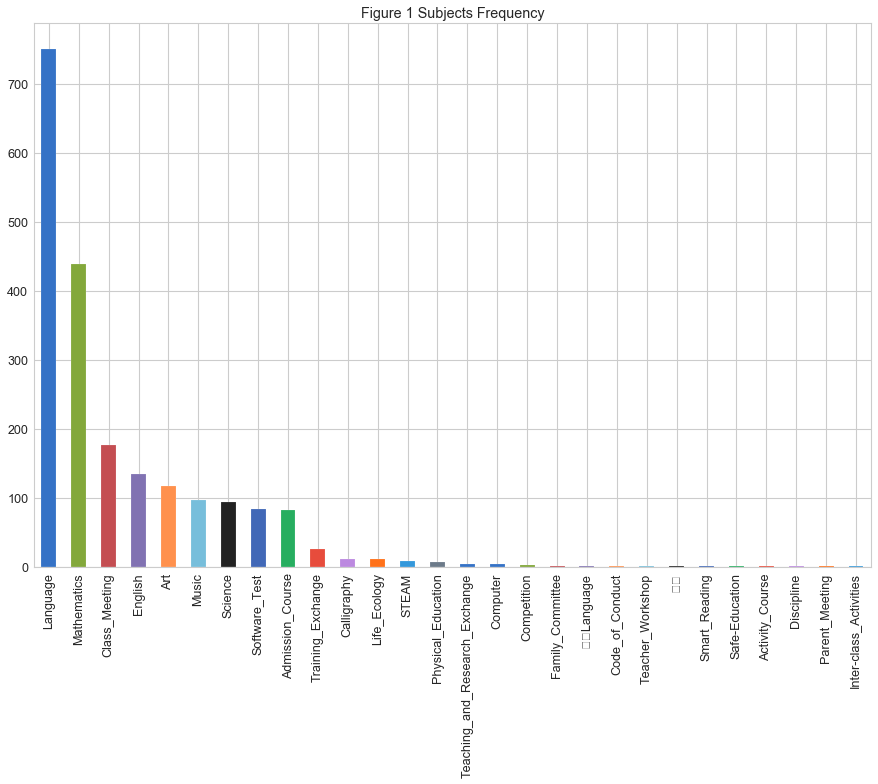

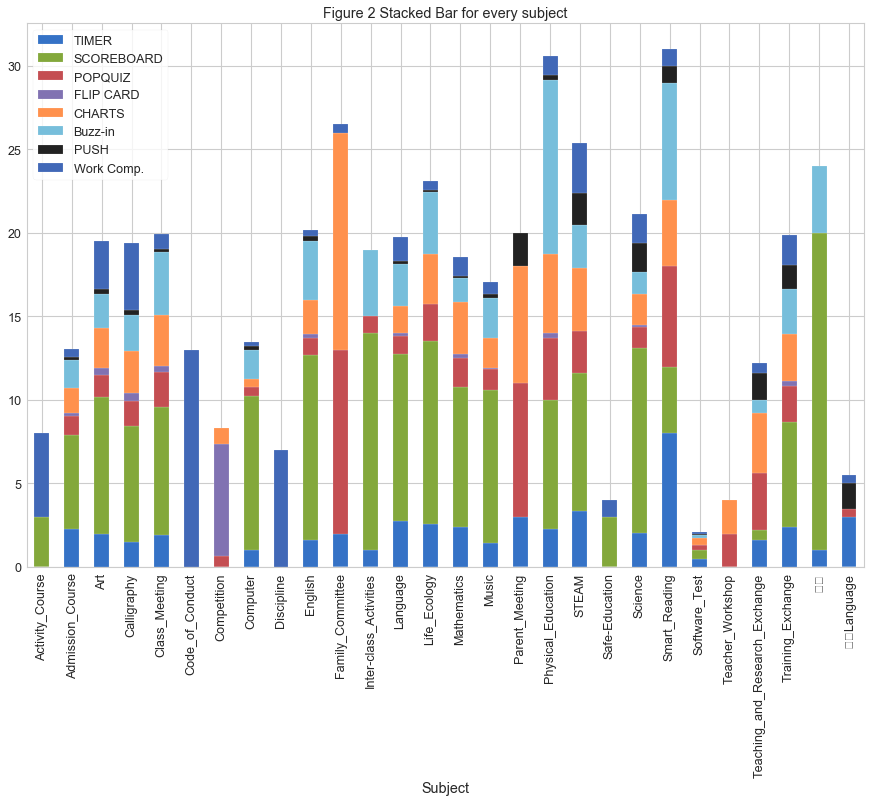

In [95]:
print(df_cleaned['Subject'].value_counts())

fig1 = df_cleaned['Subject'].value_counts().plot.bar(title='Figure 1 Subjects Frequency',figsize=(15,10)) # Frequency of Subjects
fig2 = df_by_subject.sort_index().plot.bar(stacked=True, title='Figure 2 Stacked Bar for every subject',figsize=(15,10))

### NOTATION 1
As can be observed from <b>Figure 1</b>, a subject category <b>'Language'</b> is the most taught classes (<b><i>n</i> > 700</b>), followed by <b>'Mathematics'</b> (<b><i>n</i> > 400</b>), <b>'Art'</b> (<b><i>n</i> > 100</b>), and so on.
<br> Lastly, <b>Figure 2</b> demonstrates the use of functions on HiTEACH based on every subject

<br> <b>*NOTE*</b> Language category might contain 'English' as well. Therefore, the dataset will further be improved.

-------------------------------------------------------------------------------------------------------------------------------

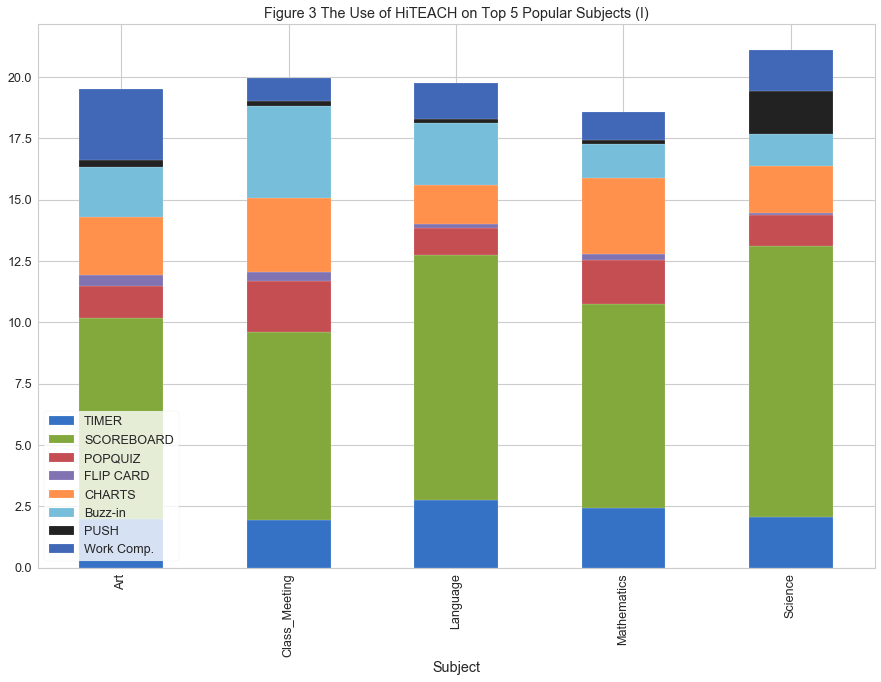

In [94]:
df_by_subject_top_5.sort_index().plot.bar(stacked = True, title='Figure 3 The Use of HiTEACH on Top 5 Popular Subjects (I)',
                                         figsize=(15,10))

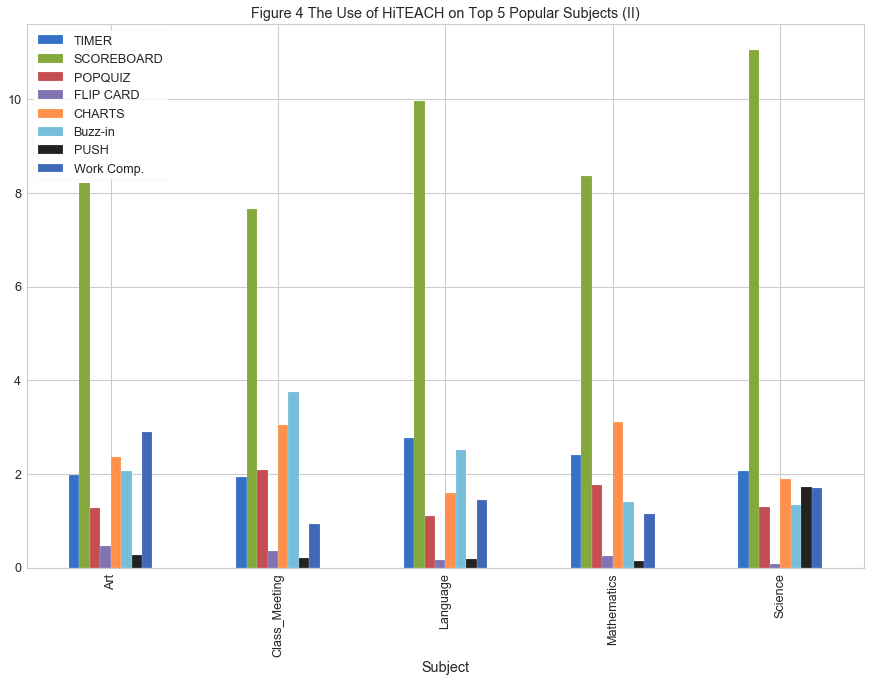

In [93]:
df_by_subject_top_5.plot.bar(title='Figure 4 The Use of HiTEACH on Top 5 Popular Subjects (II)', figsize=(15,10))

### NOTATION 2

Noticeably, <b>'Scoreboard'</b> is the most popular function for the selected subjects. Some observations are addressed as follows:

<ol> <b>Science</b>
    <li>The significance of the use of 'Scoreboard'. </li>
    <li>The lowest use of 'Flash Card' </li>
</ol>
    
<ol> <b>Language</b>
    <li>##Placeholder</li>
    <li>##Placeholder</li>
</ol>



-------------------------------------------------------------------------------------------------------------------------------

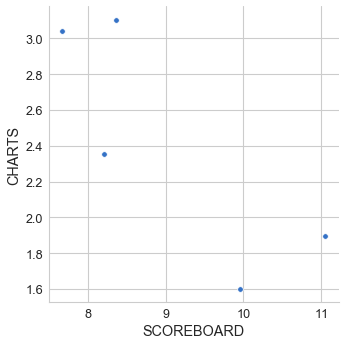

In [57]:
sns.relplot(x='SCOREBOARD', y='CHARTS', data=df_by_subject_top_5)